In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data_folder = "/content/drive/MyDrive/MLAct Project/MLAct-MLO2024-Dataset"

Sample compass jellyfish image:


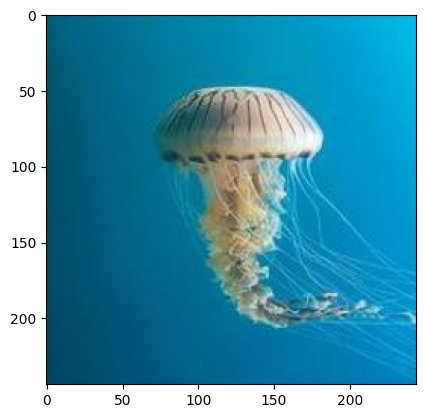


Sample barrel jellyfish image:


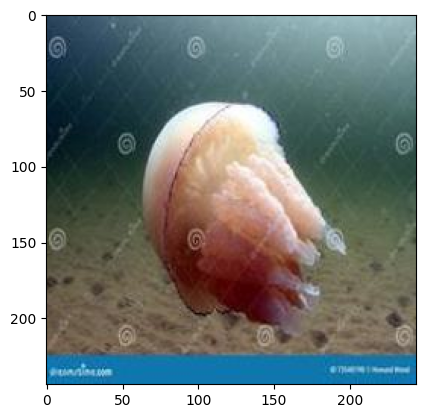


Sample lions mane jellyfish image:


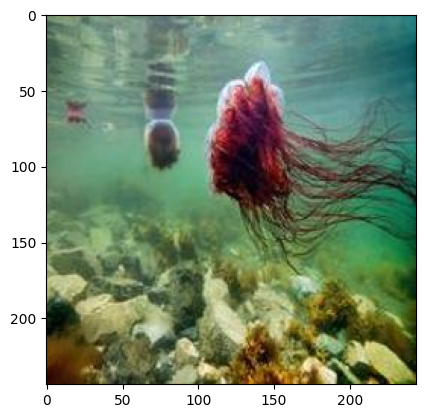


Sample mauve stinger jellyfish image:


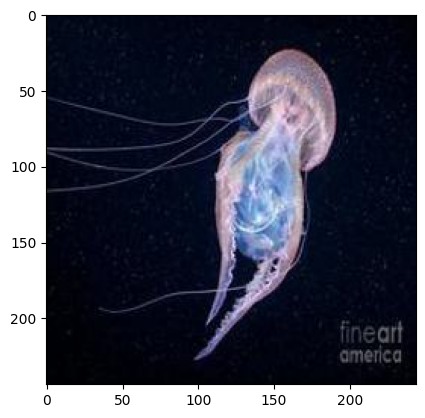


Sample moon jellyfish image:


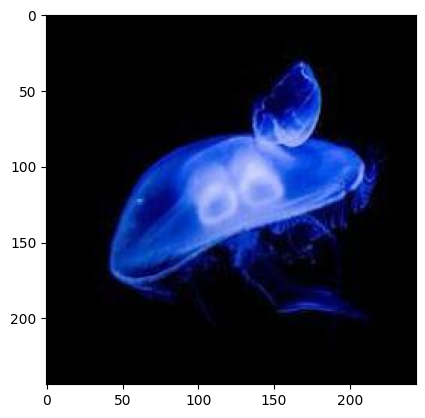


Sample plastic image:


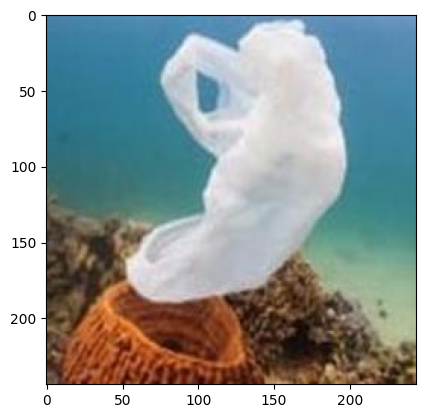

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

train_dir = os.path.join(data_folder, "train/")
test_dir = os.path.join(data_folder, "test/")

index = 20

compass_jellyfish_dir = os.path.join(train_dir, "compass_jellyfish/")
barrel_jellyfish_dir = os.path.join(train_dir, "barrel_jellyfish/")
lions_mane_jellyfish_dir = os.path.join(train_dir, "lions_mane_jellyfish/")
mauve_stinger_jellyfish_dir = os.path.join(train_dir, "mauve_stinger_jellyfish/")
moon_jellyfish_dir = os.path.join(train_dir, "moon_jellyfish/")
plastic_dir = os.path.join(train_dir, "plastic_pollution/")

print("Sample compass jellyfish image:")
plt.imshow(load_img(f"{os.path.join(compass_jellyfish_dir, os.listdir(compass_jellyfish_dir)[index])}"))
plt.show()

print("\nSample barrel jellyfish image:")
plt.imshow(load_img(f"{os.path.join(barrel_jellyfish_dir, os.listdir(barrel_jellyfish_dir)[index])}"))
plt.show()

print("\nSample lions mane jellyfish image:")
plt.imshow(load_img(f"{os.path.join(lions_mane_jellyfish_dir, os.listdir(lions_mane_jellyfish_dir)[index])}"))
plt.show()


print("\nSample mauve stinger jellyfish image:")
plt.imshow(load_img(f"{os.path.join(mauve_stinger_jellyfish_dir, os.listdir(mauve_stinger_jellyfish_dir)[index])}"))
plt.show()


print("\nSample moon jellyfish image:")
plt.imshow(load_img(f"{os.path.join(moon_jellyfish_dir, os.listdir(moon_jellyfish_dir)[index])}"))
plt.show()


print("\nSample plastic image:")
plt.imshow(load_img(f"{os.path.join(plastic_dir, os.listdir(plastic_dir)[index])}"))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(compass_jellyfish_dir, os.listdir(compass_jellyfish_dir)[index])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (244, 244, 3)
The maximum pixel value used is: 255.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(244, 244),
                                                    batch_size = 128,
                                                    class_mode='categorical'
                                                    )

Found 900 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(244, 244, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(optimizer= 'sgd',loss='categorical_crossentropy', metrics='acc')

In [ ]:
history = model.fit(train_generator,
                    epochs = 500,
                    #setps_per_epoch=12,
                    #verbose=2
                    )

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming you have already loaded your model
# model = load_model('your_model.h5')

# Define your test directory
#test_dir = "/content/drive/MyDrive/MLAct Project/MLAct-MLO2024-Dataset/test"

from google.colab import files
import zipfile
import io

# Upload the ZIP file containing the folder of images
uploaded = files.upload()

# Extract the contents of the uploaded ZIP file
for zip_filename in uploaded.keys():
    # Read the contents of the ZIP file
    zip_data = io.BytesIO(uploaded[zip_filename])

    # Create a ZipFile object
    with zipfile.ZipFile(zip_data, 'r') as zip_ref:
        # Extract all the contents to a folder
        zip_ref.extractall('test_dir')  # Change 'images_folder' to the desired folder name

###################

# Get the list of image filenames in the test directory
image_files = os.listdir(test_dir)

# Initialize a list to store the predictions
predictions = []

class_mapping = {
    0: 'compass_jellyfish',
    1: 'barrel_jellyfish',
    2: 'lions_mane_jellyfish',
    3: 'mauve_stinger_jellyfish',
    4: 'moon_jellyfish',
    5: 'plastic_pollution'
}

# Make predictions for each image
for image_file in image_files:
    image_path = os.path.join(test_dir, image_file)
    #img = load_img(image_path, target_size=(img_width, img_height))  # Adjust target size as per your model
    img = load_img(image_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Assuming class index corresponds to the predicted class
    class_name = class_mapping[predicted_class]
    predictions.append((image_file, class_name))

# Write predictions to a CSV file
output_csv_file = "predictions.csv"
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ImageID', 'PredictedClass'])  # Write header
    writer.writerows(predictions)  # Write predictions for each image

print("CSV file with predictions created successfully!")

In [ ]:
print(predictions)